In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('../datasets/IMDB Dataset.csv')

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [5]:
X = np.array(df['review'])

In [6]:
y = np.array(df['sentiment'])

In [7]:
vocab_size = 10000
max_length = 140
embedded_size = 64

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

In [9]:
tokenizer.fit_on_texts(X)

In [10]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'so': 35,
 'who': 36,
 'from': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'out': 42,
 'about': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'there': 47,
 'some': 48,
 'what': 49,
 'good': 50,
 'when': 51,
 'more': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'my': 57,
 'even': 58,
 'would': 59,
 'she': 60,
 'which': 61,
 'only': 62,
 'really': 63,
 'see': 64,
 'story': 65,
 'their': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'than': 72,
 'much': 73,
 'we': 74,
 'bad': 75,
 'been': 76,
 'get': 77,
 'do': 78,
 'great': 79,
 'other': 80,
 'will': 81,
 'also': 82,
 '

In [11]:
X_processed = tokenizer.texts_to_sequences(X)

In [12]:
X_processed

[[28,
  5,
  2,
  80,
  2103,
  46,
  1073,
  13,
  101,
  148,
  40,
  308,
  3185,
  399,
  475,
  27,
  3196,
  34,
  24,
  204,
  15,
  12,
  7,
  622,
  49,
  597,
  17,
  69,
  8,
  8,
  2,
  87,
  149,
  13,
  3242,
  69,
  43,
  3185,
  14,
  93,
  5399,
  3,
  1,
  135,
  5,
  571,
  61,
  269,
  9,
  204,
  37,
  2,
  662,
  140,
  1741,
  69,
  12,
  7,
  22,
  4,
  120,
  16,
  2,
  7889,
  2334,
  39,
  1,
  12,
  120,
  2596,
  55,
  5912,
  17,
  5511,
  6,
  1480,
  377,
  39,
  571,
  93,
  7,
  3805,
  9,
  2,
  361,
  357,
  5,
  2,
  662,
  8,
  8,
  10,
  7,
  434,
  3185,
  15,
  13,
  7,
  2,
  1,
  359,
  6,
  2,
  1,
  6814,
  2539,
  1065,
  1,
  10,
  2712,
  1422,
  21,
  1,
  539,
  33,
  4637,
  2469,
  5,
  2,
  1209,
  118,
  30,
  2,
  7018,
  26,
  2971,
  1,
  3,
  392,
  1,
  35,
  1,
  7,
  22,
  300,
  21,
  2,
  4911,
  7365,
  539,
  7,
  345,
  6,
  107,
  1,
  8162,
  1,
  1,
  5051,
  7890,
  2454,
  3,
  52,
  35,
  1,
  328,
  9107,
  7366,


In [13]:
X_padded = pad_sequences(X_processed, maxlen=max_length, truncating='post', padding='post')

In [14]:
X_padded.shape

(50000, 140)

In [15]:
X_padded[0]

array([  28,    5,    2,   80, 2103,   46, 1073,   13,  101,  148,   40,
        308, 3185,  399,  475,   27, 3196,   34,   24,  204,   15,   12,
          7,  622,   49,  597,   17,   69,    8,    8,    2,   87,  149,
         13, 3242,   69,   43, 3185,   14,   93, 5399,    3,    1,  135,
          5,  571,   61,  269,    9,  204,   37,    2,  662,  140, 1741,
         69,   12,    7,   22,    4,  120,   16,    2, 7889, 2334,   39,
          1,   12,  120, 2596,   55, 5912,   17, 5511,    6, 1480,  377,
         39,  571,   93,    7, 3805,    9,    2,  361,  357,    5,    2,
        662,    8,    8,   10,    7,  434, 3185,   15,   13,    7,    2,
          1,  359,    6,    2,    1, 6814, 2539, 1065,    1,   10, 2712,
       1422,   21,    1,  539,   33, 4637, 2469,    5,    2, 1209,  118,
         30,    2, 7018,   26, 2971,    1,    3,  392,    1,   35,    1,
          7,   22,  300,   21,    2, 4911, 7365,  539])

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [17]:
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedded_size, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 8960)              0         
                                                                 
 dense (Dense)               (None, 10)                89610     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 729,621
Trainable params: 729,621
Non-trainable params: 0
_________________________________________________________________


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=41)

In [21]:
X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=41)

In [22]:
X_train.shape

(32000, 140)

In [23]:
X_val.shape

(8000, 140)

In [24]:
y_train.shape

(32000,)

In [25]:
history_model = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.4347 - accuracy: 0.7847 - val_loss: 0.3406 - val_accuracy: 0.8528
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1439 - accuracy: 0.9493 - val_loss: 0.4363 - val_accuracy: 0.8369
Epoch 3/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0166 - accuracy: 0.9973 - val_loss: 0.5374 - val_accuracy: 0.8413
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5921 - val_accuracy: 0.8460
Epoch 5/10
1000/1000 [==============================] - 9s 9ms/step - loss: 4.7153e-04 - accuracy: 1.0000 - val_loss: 0.6353 - val_accuracy: 0.8472
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 2.1949e-04 - accuracy: 1.0000 - val_loss: 0.6737 - val_accuracy: 0.8476
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.1237e-04 - accuracy: 1.0000 - val_loss: 0.7095 - v

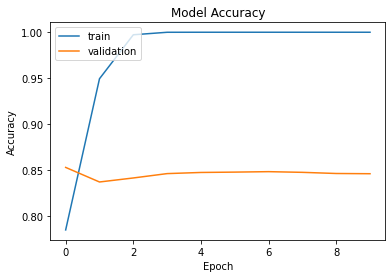

In [26]:
import matplotlib.pyplot as plt

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [27]:
model_2 = Sequential()

model_2.add(Embedding(input_dim=vocab_size, output_dim=embedded_size, input_length=max_length))
model_2.add(Flatten())
model_2.add(Dense(units=5, activation='relu'))
model_2.add(Dense(units=1, activation='sigmoid'))

In [28]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_model_2 = model_2.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.4343 - accuracy: 0.7869 - val_loss: 0.3487 - val_accuracy: 0.8482
Epoch 2/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1481 - accuracy: 0.9511 - val_loss: 0.4170 - val_accuracy: 0.8300
Epoch 3/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0181 - accuracy: 0.9974 - val_loss: 0.4827 - val_accuracy: 0.8425
Epoch 4/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.5391 - val_accuracy: 0.8459
Epoch 5/5
1000/1000 [==============================] - 9s 9ms/step - loss: 7.1054e-04 - accuracy: 1.0000 - val_loss: 0.5813 - val_accuracy: 0.8469


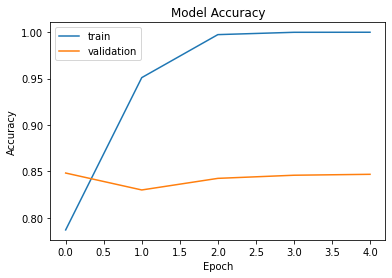

In [29]:
import matplotlib.pyplot as plt

plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [30]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5750 - accuracy: 0.8446


[0.57497239112854, 0.8446000218391418]

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7721 - accuracy: 0.8508


[0.7721384167671204, 0.8507999777793884]

In [32]:
model.save('../models/first_model.h5')

In [33]:
model_2.save('../models/second_model/h5')

INFO:tensorflow:Assets written to: ../models/second_model/h5\assets


In [34]:
model_2.save('../models/second_model.h5')